In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [333]:
from matplotlib.pyplot import xticks
%matplotlib inline

In [334]:
data = pd.read_csv(r"C:\Users\jithi\Desktop\Country-data activity 14.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [335]:
#checking duplicates
sum(data.duplicated(subset = 'country')) == 0

True

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [337]:
data.shape

(167, 10)

In [338]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [339]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [340]:
# No NULL values

In [341]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

(9.5, -0.5)

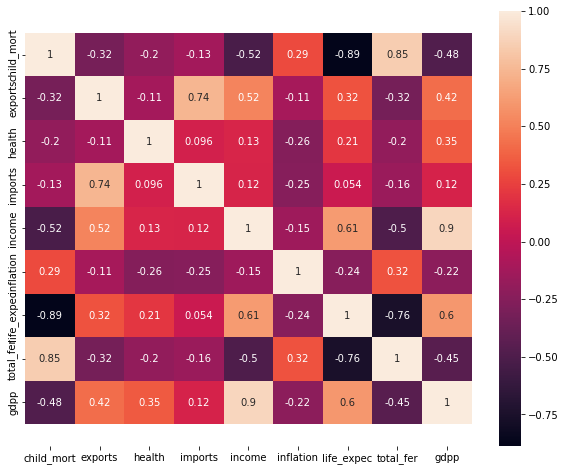

In [342]:
plt.figure(figsize = (10,8))        
ax = sns.heatmap(data.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [343]:
#child_mortality and life_expentency are highly correlated with correlation of -0.89
#child_mortality and total_fertility are highly correlated with correlation of 0.85
#imports and exports are highly correlated with correlation of 0.74
#life_expentency and total_fertility are highly correlated with correlation of -0.76

In [344]:
#sns.pairplot(data)

In [345]:
#Outlier Detection and Handling


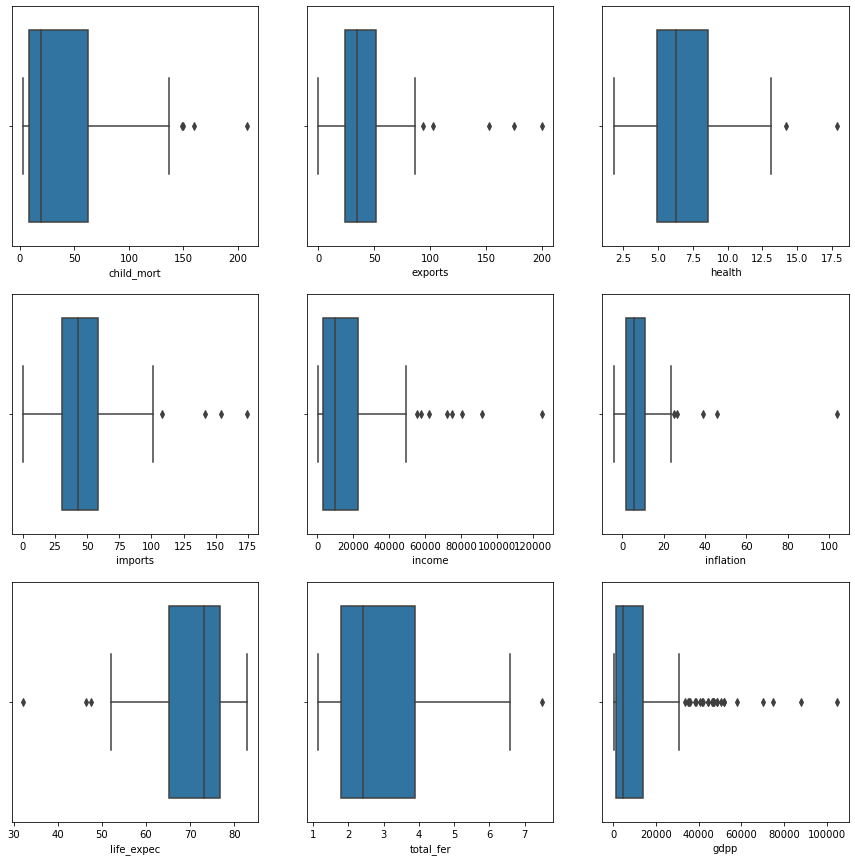

In [346]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data[i], ax=ax[x])
plt.show()

In [347]:
data['exports'] = data['exports'] * data['gdpp']/100
data['imports'] = data['imports'] * data['gdpp']/100
data['health'] = data['health'] * data['gdpp']/100

In [348]:
data.head(5)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [349]:
data1 = data.copy()


In [350]:
Q1 = data1['exports'].quantile(0.25)
Q2 = data1['exports'].quantile(0.50)
Q3 = data1['exports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['exports']=np.where(data1['exports']>upper_limit,upper_limit,np.where(data1['exports']<lower_limit,lower_limit,data1['exports']))

In [351]:
Q1 = data1['imports'].quantile(0.25)
Q2 = data1['imports'].quantile(0.50)
Q3 = data1['imports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['imports']=np.where(data1['imports']>upper_limit,upper_limit,np.where(data1['imports']<lower_limit,lower_limit,data1['imports']))

In [352]:
Q1 = data1['health'].quantile(0.25)
Q2 = data1['health'].quantile(0.50)
Q3 = data1['health'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['health']=np.where(data1['health']>upper_limit,upper_limit,np.where(data1['health']<lower_limit,lower_limit,data1['health']))

In [353]:
Q1 = data1['income'].quantile(0.25)
Q2 = data1['income'].quantile(0.50)
Q3 = data1['income'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['income']=np.where(data1['income']>upper_limit,upper_limit,np.where(data1['income']<lower_limit,lower_limit,data1['income']))

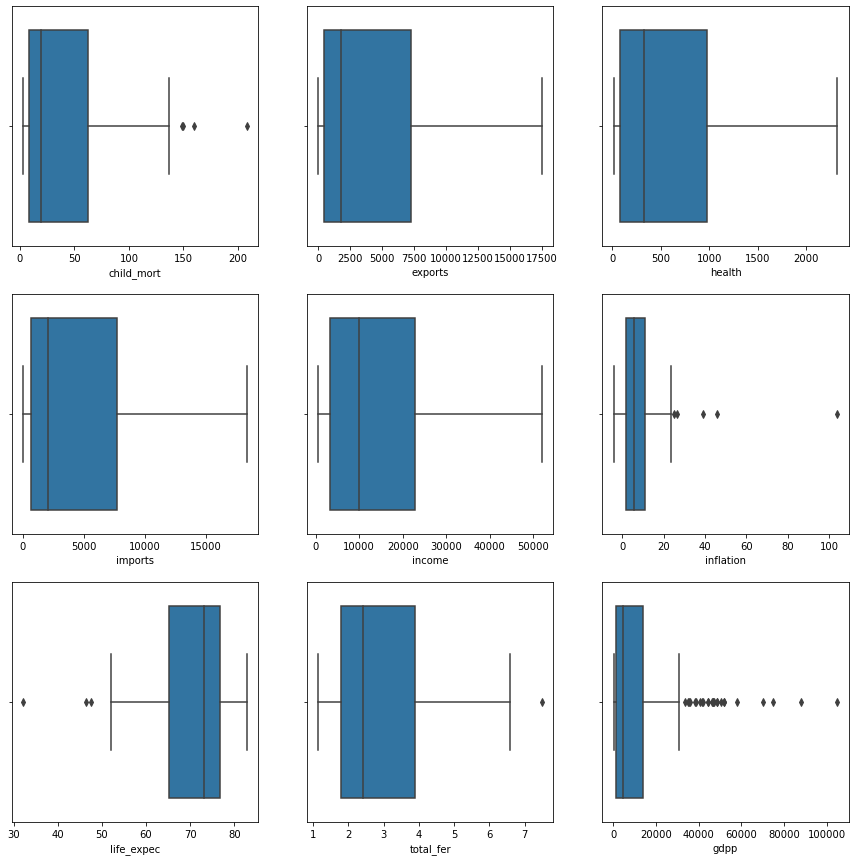

In [354]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data1.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data1[i], ax=ax[x])
plt.show()

In [355]:
#Data Scaling

In [356]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Standarisation technique for scaling

warnings.filterwarnings("ignore")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_drop)

In [357]:
data_scaled


array([[ 1.29153238, -0.21746834, -0.36526547, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.2145601 , -0.35631298, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.21271358, -0.3585351 , ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.21671522, -0.36447916, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.21716569, -0.36471695, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.21699453, -0.36441096, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [358]:
#K-Means Clustering

In [359]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)
print(inertia)

[1503.0000000000002, 1034.0218437620156, 698.6191254397777, 442.8278922795074, 363.57353461653474, 311.9243207214797, 267.56290475062116, 236.7960322702365, 213.40808252897193, 188.10656056710616]


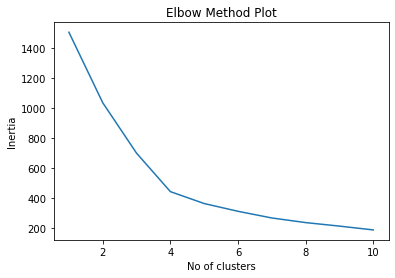

In [360]:
plt.plot(ks,inertia)
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [361]:
#cluster=KMeans(n_clusters=4,init='k-means++',random_state=42)
#model=cluster.fit(data)
model_kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
model_kmeans.fit(data_scaled)
km=model_kmeans.predict(data_scaled)
print(model_kmeans.labels_)


[2 0 0 2 0 0 0 1 1 0 0 0 0 0 0 1 0 2 0 0 0 2 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 0 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 0 0 0 2 2 0 2 0 1 0 0 0 2 1
 0 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 3 0 2 2 0 0 2 0 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 0 2 0 0 0 0 0 0 1 0 0 2 0 0 2 0 0 2 1 0 0 2 2 0 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]


In [362]:
data1['KMean_ClusterID']= pd.Series(km)
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0


In [363]:
#Agglomerative Heirarchial Clustering

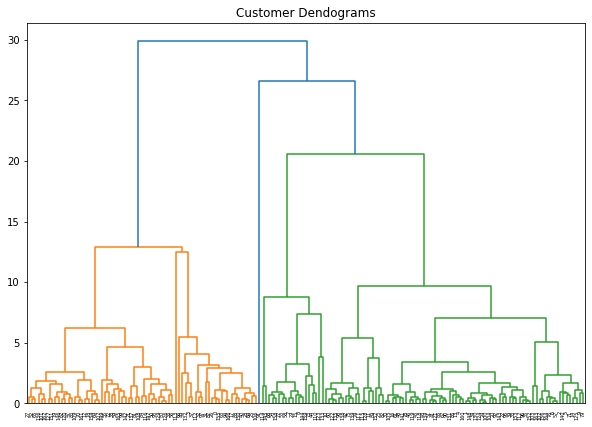

In [364]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)


plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))





In [365]:
model_kmeans = KMeans(n_clusters=4,max_iter=50,random_state = 42)
model_kmeans.fit(data_scaled)
labels = model_kmeans.predict(data_scaled)
print(labels)

[2 0 0 2 0 0 0 1 1 0 0 0 0 0 0 1 0 2 0 0 0 2 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 0 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 0 0 0 2 2 0 2 0 1 0 0 0 2 1
 0 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 3 0 2 2 0 0 2 0 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 0 2 0 0 0 0 0 0 1 0 0 2 0 0 2 0 0 2 1 0 0 2 2 0 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]


In [366]:
data1['AHC_ClusterID']= pd.Series(labels)
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID,AHC_ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0,0


In [367]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_scaled,labels,metric='euclidean',random_state=42)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.439


In [368]:
data1['cluster_no']= model_kmeans.labels_
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID,AHC_ClusterID,cluster_no
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2,2,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2,2,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0,0,0


In [369]:
data3 = data1.groupby(['cluster_no']).mean()
data3

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID,AHC_ClusterID
cluster_no,,,,,,,,,,,
0,20.209783,3755.455310,554.573268,3869.448898,14123.804348,7.035326,73.534783,2.225543,8122.521739,0.0,0.0
1,5.065385,14673.393846,2105.521346,14629.875962,43095.096154,2.960038,80.492308,1.781154,46965.384615,1.0,1.0
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,2.0,2.0
3,2.800000,17524.290000,2324.546750,18338.677500,51967.500000,3.620000,81.300000,1.630000,105000.000000,3.0,3.0


In [370]:
cluster=data[data1['cluster_no']==0]
cluster.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
109,Nepal,47.0,56.7136,31.0800,215.488,1990,15.100,68.3,2.61,592
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110,12.500,69.6,3.51,738
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.120,66.1,2.88,786
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790,10.000,68.5,3.10,880
...,...,...,...,...,...,...,...,...,...,...
122,Portugal,3.9,6727.5000,2475.0000,8415.000,27200,0.643,79.8,1.39,22500
135,Slovenia,3.2,15046.2000,2201.9400,14718.600,28700,-0.987,79.5,1.57,23400
60,Greece,3.9,5944.9000,2770.7000,8258.300,28700,0.673,80.4,1.48,26900
10,Bahamas,13.8,9800.0000,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000
